In [1]:
#@title Import Libraries

import matplotlib.pyplot as plt
import os
import warnings

from google.colab import drive
drive.mount('/content/drive',
           force_remount = True)

%cd /content/drive/My Drive/Physics Research/CMS/Analysis/TTTT TMVA DNN/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Physics Research/CMS/Analysis/TTTT TMVA DNN


In [0]:
#@title Set some initial values

nVars = 61
opt = 1 # 0 or 1
file_path = os.getcwd() + "/"

In [0]:
#@title Extract importance values from file and sort
#@markdown Upload the "VariableImportanceResults_#vars_opt#.txt" file onto your
#@markdown directory from which you are running this script. You can do this by
#@markdown `scp <LPC Username>@cmslpc-sl7.fnal.gov://path/to/.txt/file .` and 
#@markdown then import the file.

value_list = []
frequency_list = []
rms_list = []
variable_list = []

start_reading = False   # don't edit

with open(file_path + "VariableImportanceResults_" + str(nVars) + "vars_opt" + str(opt) + ".txt") as file:
  for line in file.readlines():
    if start_reading == True:
      content = line.split("/")
      frequency_list.append(float(content[1].strip()))
      variable_list.append(content[0].split(".")[1].strip())
      if opt == 0:
        value_list.append(float(content[2].strip()))
      elif opt == 1:
        value_list.append(float(content[2].strip()))
        rms_list.append(float(content[3].strip()))
    if "Variable Name" in line: start_reading = True


if opt == 0:
  value_list_sort, variable_list_sort = zip(*sorted(zip(
      value_list,variable_list
      )))
elif opt == 1:
  value_list_sort, rms_list_sort, variable_list_sort = zip(*sorted(zip(
      value_list,rms_list,variable_list
      )))

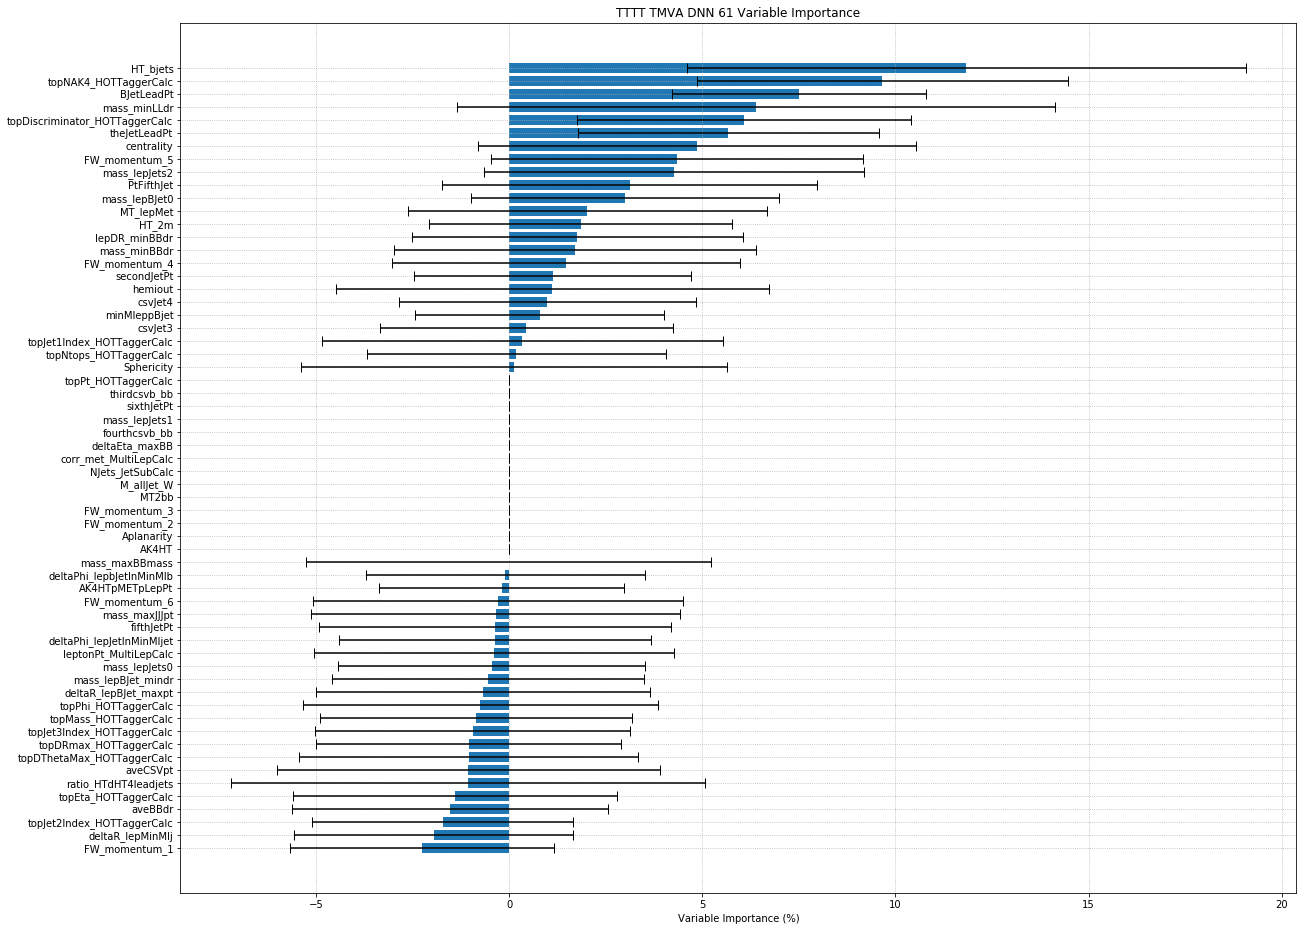

In [30]:
#@title Plot the variable importance
plt.close()
plt.figure(figsize=(20,16))
if opt == 0:
  plt.barh(variable_list_sort,value_list_sort)
elif opt == 1:
  plt.barh(variable_list_sort,value_list_sort,xerr=rms_list_sort,
           align='center',
           capsize=5.0)
plt.title('TTTT TMVA DNN ' + str(nVars) + ' Variable Importance')
plt.grid(which = 'both',linestyle = ':')
plt.xlabel('Variable Importance (%)')
plt.savefig(file_path + \
            "VariableImportanceResults_" + str(nVars) + "vars_opt" + str(opt) + \
            ".png")
plt.show()

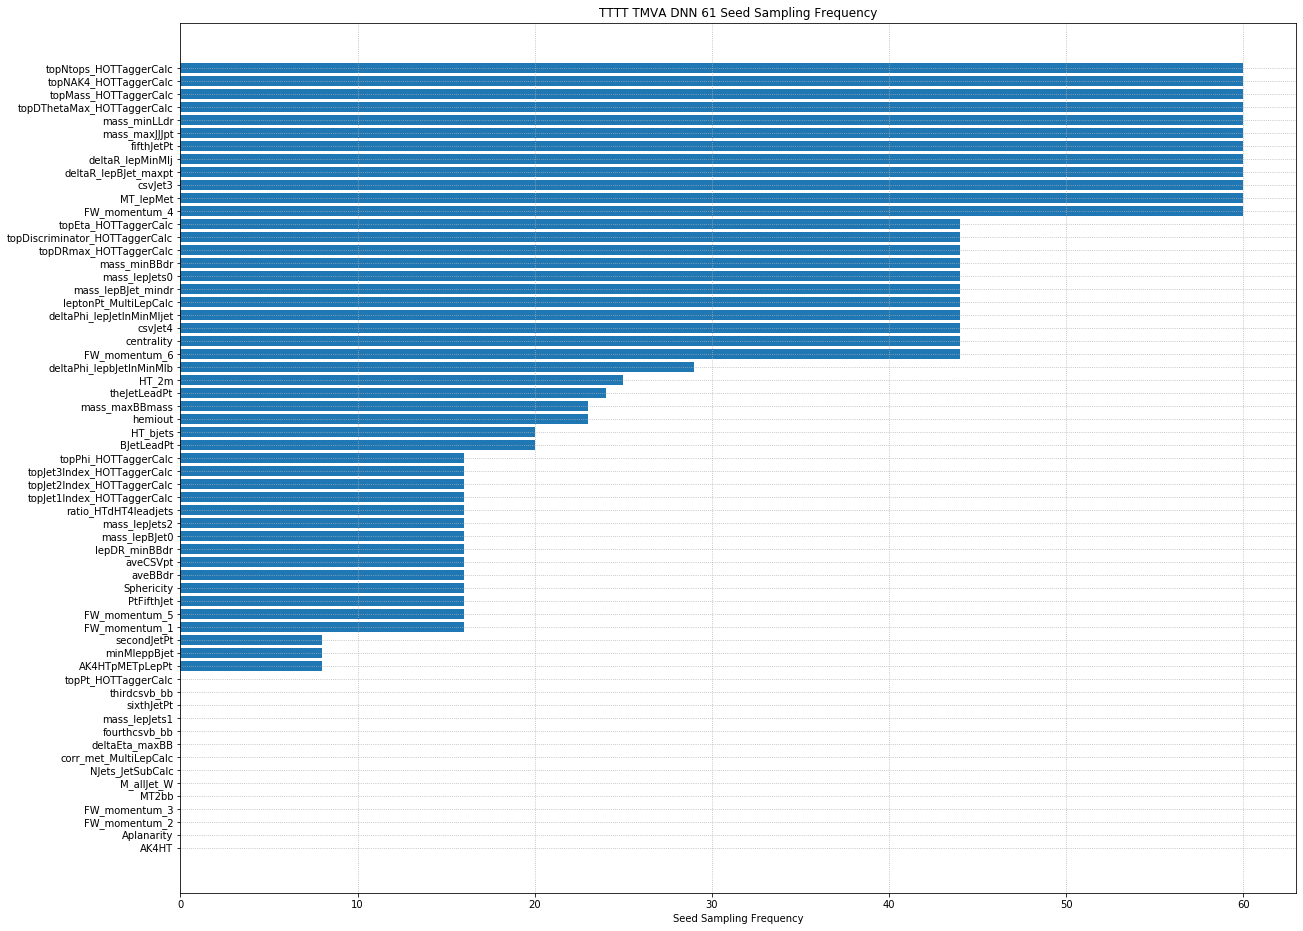

In [26]:
#@title Plot the variable importance
frequency_list_sort, variable_list_sort = zip(*sorted(zip(
    frequency_list,variable_list
    )))

plt.close()
plt.figure(figsize=(20,16))
plt.barh(variable_list_sort,frequency_list_sort)
plt.title('TTTT TMVA DNN ' + str(nVars) + ' Seed Sampling Frequency')
plt.grid(which = 'both',linestyle = ':')
plt.xlabel('Seed Sampling Frequency')
plt.savefig(file_path + \
            "VariableImportanceSamplingFrequency_" + str(nVars) + "vars" + \
            ".png")
plt.show()